# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

### 
- TfidfVectorizer은 text가 가지고 있는 모든 단어를 Bow로 구성하고 이 단어들에 대해 Tf-idf 값을 계산한 뒤 각 단어의 인덱스 위치에 Tf-idf 값이 들어간 벡터가 만들어진다.
    - 특정 단어를 가지고 있지 않다면 Tf = 0
    - Tf : 하나의 문서에서 특정 단어가 등장하는 횟수
    - idf : df는 문서 빈도, 특정 단어가 몇 개의 문서에서 등장하는지를 수치화, 이것의 역수가 idf
        - 역수 개념을 사용하는 이유는 적은 문서에 등장할수록 큰 숫자가 되게 하고 반대로 많은 문서에 등장할 수록 숫자가 작아지게 함으로써 여러 문서에 의미 없이 사용되는 단어의 가중치를 줄이기 위함.
    - Tf값과 idf값을 곱하여 구해지고 해당 연산을 거친 최종 Tf-idf값은 0과 1사이로 만들어진다.

In [2]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_distances

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tmdwn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tmdwn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
def jaccard_similarity(d1, d2) :
    lemmatizer = WordNetLemmatizer()
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]    
    
    # 두 문장에서 공통되게 사용되는 단어를 계산해야한다.
    inter = len(set(words1).intersection(set(words2)))
    print(set(words1).intersection(set(words2)))
    
    # 공통되게 사용하는 단어의 전체 개수
    union = len(set(words1).union(set(words2)))
    print(set(words1).union(set(words2)))
    return inter/union

In [4]:
# 자카르드
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1,d2))
print("-" * 50)
print(jaccard_similarity(d1,d3))
print("-" * 50)
print(jaccard_similarity(d2,d3))

{'man', '.', 'a', 'of'}
{'.', 'a', 'no', 'man', 'of', 'try', 'and', 'think', 'thought', 'rather', 'value', 'but', 'to', 'like', 'become', 'success', 'action', 'act'}
0.2222222222222222
--------------------------------------------------
{'.', 'of'}
{'liberty', 'thought', 'a', '.', 'death', 'man', 'of', 'like', 'give', 'and', ',', 'me', 'think', 'action', 'act'}
0.13333333333333333
--------------------------------------------------
{'.', 'of'}
{'liberty', '.', 'a', 'no', 'man', 'of', 'try', 'give', 'me', 'death', 'rather', 'value', 'to', 'become', ',', 'success', 'but'}
0.11764705882352941


In [5]:
# 코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]
tfidf = tiv.fit_transform(corpus)

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [7]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [8]:
raw = [x.decode() for x in raw[1:10000]]

In [9]:
raw

['8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n',
 '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n',
 '4655635\t폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.\t1\n',
 '9251303\t와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지\t1\n',
 '10067386\t안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.\t1\n',
 '2190435\t사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화\t1\n',
 '9279041\t완전 감동입니다 다시봐도 감동\t1\n',
 '7865729\t개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음\t1\n',
 '7477618\t굿\t1\n',
 '9250537\t바보가 아니라 병 쉰 인듯\t1\n',
 '9730759\t내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...\t1\n',
 '640794\t재밌다\t1\n',
 '9537008\t고질라니무 귀엽다능ㅋㅋ\t1\n',
 '4911311\t영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.\t1\n',
 '6686673\t3도 반전 좋았제 ^^\t1\n',
 '9034036\t평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.\t1\n',
 '979683\t네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..\t1\n',
 '165498\t단연 최고\t1\n',
 '8703997\t가면 갈수록 더욱 빠져드네요 밀회 화이팅!!\t1\n',
 '9468781\t어?생각없이 봤는데 상당한 수작.일본영화 10년내 최

In [10]:
raw[0]

'8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n'

In [11]:
raw[0].split('\t')[1]

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [12]:
reviews = []
for i in raw :
    reviews.append(i.split('\t')[1])

In [13]:
reviews

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음',
 '굿',
 '바보가 아니라 병 쉰 인듯',
 '내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...',
 '재밌다',
 '고질라니무 귀엽다능ㅋㅋ',
 '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.',
 '3도 반전 좋았제 ^^',
 '평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.',
 '네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..',
 '단연 최고',
 '가면 갈수록 더욱 빠져드네요 밀회 화이팅!!',
 '어?생각없이 봤는데 상당한 수작.일본영화 10년내 최고로 마음에 들었다.강렬한 임팩트가 일품.',
 '오랜만에 본 제대로 된 범죄스릴러~',
 "그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때. 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다.",
 '마지막씬을 잊을수가 없다',
 '강압적용서,세뇌적용서에 대한 비판',
 '중세시대명작. 굿 평점이왜이래',
 '7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다. 아름답고 슬픈 OST

In [14]:
len(reviews)

9999

In [15]:
from konlpy.tag import Komoran

komoran = Komoran()
reviews = [komoran.morphs(x) for x in reviews]

print(reviews)

[['어리', 'ㄹ', '때', '보고', '지금', '다시', '보', '아도', '재밌어요ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일구', 'ㄴ', '전통', '을', '통하', '아', '발전', '하', '아', '가', '는', '문화', '산업', '이', '부럽', '었', '는데', '.', '사실', '우리나라', '에서', '도', '그', '어렵', 'ㄴ', '시절', '에', '끝', '까지', '열정', '을', '지키', 'ㄴ', '노라', '노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이루', '어', '나가', 'ㄹ', '수', '있', '다는', '것', '에', '감사', '하', 'ㅂ니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버리', 'ㄹ께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['오', '아', '.', '.', '연기', '가', '진짜', '개', '쩌', 'ㄹ', '구나', '..', '지루', '하', 'ㄹ', '것', '라고', '생각', '하', '았', '는데', '몰입', '하', '아서', '보', '았', '다', '.', '.', '그러', '어', '이렇', 'ㄴ', '게', '진짜', '영', '화지'], ['안개', '자욱', '하', 'ㄴ', '밤하늘', '에', '뜨', '어', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해보', 'ㄴ', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '이', 'ㅂ니다', '다시',

In [16]:
print(reviews[:5])

[['어리', 'ㄹ', '때', '보고', '지금', '다시', '보', '아도', '재밌어요ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일구', 'ㄴ', '전통', '을', '통하', '아', '발전', '하', '아', '가', '는', '문화', '산업', '이', '부럽', '었', '는데', '.', '사실', '우리나라', '에서', '도', '그', '어렵', 'ㄴ', '시절', '에', '끝', '까지', '열정', '을', '지키', 'ㄴ', '노라', '노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이루', '어', '나가', 'ㄹ', '수', '있', '다는', '것', '에', '감사', '하', 'ㅂ니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버리', 'ㄹ께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['오', '아', '.', '.', '연기', '가', '진짜', '개', '쩌', 'ㄹ', '구나', '..', '지루', '하', 'ㄹ', '것', '라고', '생각', '하', '았', '는데', '몰입', '하', '아서', '보', '았', '다', '.', '.', '그러', '어', '이렇', 'ㄴ', '게', '진짜', '영', '화지'], ['안개', '자욱', '하', 'ㄴ', '밤하늘', '에', '뜨', '어', '있', '는', '초승달', '같', '은', '영화', '.']]


## Word2Vec 생성
* word2vec 생성에 필요한 라이브러리들을 추가

In [17]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE                  # 시각화
from matplotlib import font_manager as fm          # 시각화
from matplotlib import rc

- word2vec 모델 생성
- gensim의 word2vec은 선언과 동시에 학습을 진행

In [18]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

C:\Users\tmdwn\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [19]:
word2vec.wv.most_similar("영화")

[('작품', 0.9498364925384521),
 ('듯', 0.9454331398010254),
 ('마음', 0.9449446201324463),
 ('남', 0.9398959875106812),
 ('표현', 0.9390374422073364),
 ('가슴', 0.9364271759986877),
 ('최선', 0.9343181848526001),
 ('보석', 0.9325684905052185),
 ('오래되', 0.931110680103302),
 ('영화인', 0.9285869002342224)]

- t-sne을 이용한 단어 벡터 시각화

In [20]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [21]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

C:\Users\tmdwn\AppData\Local\Temp\ipykernel_12520\304006666.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  similarity = word2vec[vocab]


array([[-0.07424695, -0.02945073, -0.0023694 , ..., -0.43123335,
         0.01549744,  0.1637829 ],
       [-0.61878294, -0.44484457,  0.18934314, ..., -0.991368  ,
         0.5226638 ,  0.78797156],
       [-0.10978795, -0.25154576, -0.07262306, ..., -0.7078192 ,
         0.16375199,  0.45356423],
       ...,
       [-0.0229853 ,  0.0041791 ,  0.01187115, ..., -0.01222175,
        -0.00392846,  0.00262945],
       [-0.0191631 ,  0.00941187,  0.02127951, ..., -0.02301045,
        -0.00851228, -0.00302153],
       [-0.02475151,  0.01201514,  0.02921554, ..., -0.02350434,
        -0.00592834,  0.00572866]], dtype=float32)

In [30]:
vocab

{'어리': <gensim.models.keyedvectors.Vocab at 0x239ffea9f40>,
 'ㄹ': <gensim.models.keyedvectors.Vocab at 0x239e79b4d00>,
 '때': <gensim.models.keyedvectors.Vocab at 0x239e7ac7040>,
 '보고': <gensim.models.keyedvectors.Vocab at 0x239fe91e730>,
 '지금': <gensim.models.keyedvectors.Vocab at 0x239fe91eb20>,
 '다시': <gensim.models.keyedvectors.Vocab at 0x239fe91eaf0>,
 '보': <gensim.models.keyedvectors.Vocab at 0x239ffed9040>,
 '아도': <gensim.models.keyedvectors.Vocab at 0x239ffed90a0>,
 '을': <gensim.models.keyedvectors.Vocab at 0x239ffed9100>,
 '배우': <gensim.models.keyedvectors.Vocab at 0x239ffed9160>,
 '는': <gensim.models.keyedvectors.Vocab at 0x239ffed91c0>,
 '학생': <gensim.models.keyedvectors.Vocab at 0x239ffed9220>,
 '으로': <gensim.models.keyedvectors.Vocab at 0x239ffed9280>,
 ',': <gensim.models.keyedvectors.Vocab at 0x239ffed92e0>,
 '외국': <gensim.models.keyedvectors.Vocab at 0x239ffed9340>,
 '와': <gensim.models.keyedvectors.Vocab at 0x239ffed93a0>,
 '그': <gensim.models.keyedvectors.Vocab at 0x23

In [26]:
similarity.shape

(2439, 100)

In [24]:
len(similarity)

2439

In [25]:
len(vocab)

2439

In [85]:
# 시각화
import pandas as pd
# 2차원되어 저장
transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index = vocab, columns = ["x", "y"])
df[:10]

,x,y
어리,57.003796,-27.568016
ㄹ,55.052330,-38.406227
때,59.729580,-28.101372
보고,52.068676,-24.596043
지금,60.176685,-29.239397
다시,61.165062,-28.961124
보,61.475121,-28.364225
아도,61.398529,-29.158007
을,46.181599,-39.664101
배우,39.333050,-33.876740


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


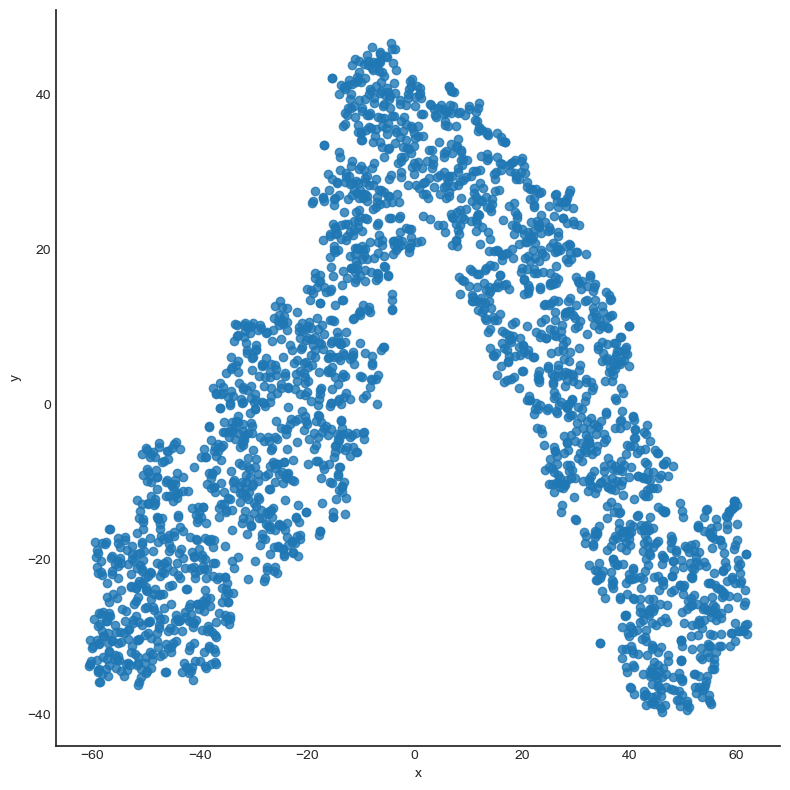

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

sns.lmplot('x', 'y', data = df, fit_reg = False, size = 8)
plt.show()

- word2vec을 tsne로 2차원으로 바꾸어서 표현

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 여러개의 군집 중에서 가장 유사도가 높은 혹은 거리가 가까운 군집 두 개를 선택하여 하나로 합치면서 군집 개수를 줄여 가는 방법
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼

### Scikit-learn

- 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
- 병합 군집
    - 각각의 데이터 포인트를 하나의 클러스터로 지정하고, 지정된 개수의 클러스터가 남을 때까지 가장 비슷한 두 클러스터를 합쳐 나가는 알고리즘.
- 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침
      - Ward 방식이 대부분의 데이터 세트에 알맞게 동작한다.

#### ward

In [87]:
df

,x,y
어리,57.003796,-27.568016
ㄹ,55.052330,-38.406227
때,59.729580,-28.101372
보고,52.068676,-24.596043
지금,60.176685,-29.239397
...,...,...
아줌마,-58.776455,-26.918600
예뻐,-54.827545,-18.373825
비밀,-60.603088,-33.686810
검사,-56.886513,-26.879713


In [88]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage = "ward")
predict = ward.fit_predict(df)
predict

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [89]:
results = df.copy()
results['predict'] = predict
results[:10]

,x,y,predict
어리,57.003796,-27.568016,2
ㄹ,55.052330,-38.406227,2
때,59.729580,-28.101372,2
보고,52.068676,-24.596043,2
지금,60.176685,-29.239397,2
다시,61.165062,-28.961124,2
보,61.475121,-28.364225,2
아도,61.398529,-29.158007,2
을,46.181599,-39.664101,2
배우,39.333050,-33.876740,2


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


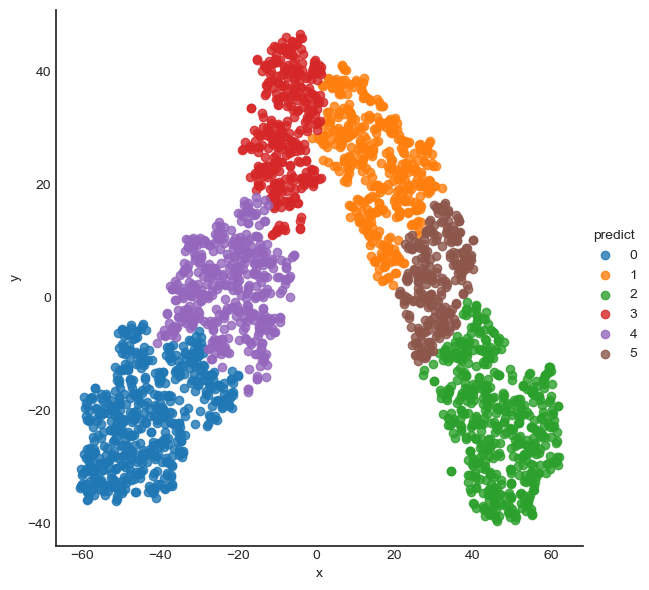

In [91]:
# 시각화해보자
sns.lmplot("x", "y", data = results, fit_reg = False, size = 6, hue = "predict")
plt.show()

#### average

In [92]:
avg = AgglomerativeClustering(n_clusters=6, linkage="average")
predict = avg.fit_predict(df)
predict

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [93]:
results = df.copy()
results["predict"] = predict
results[:10]

,x,y,predict
어리,57.003796,-27.568016,0
ㄹ,55.052330,-38.406227,0
때,59.729580,-28.101372,0
보고,52.068676,-24.596043,0
지금,60.176685,-29.239397,0
다시,61.165062,-28.961124,0
보,61.475121,-28.364225,0
아도,61.398529,-29.158007,0
을,46.181599,-39.664101,0
배우,39.333050,-33.876740,0


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


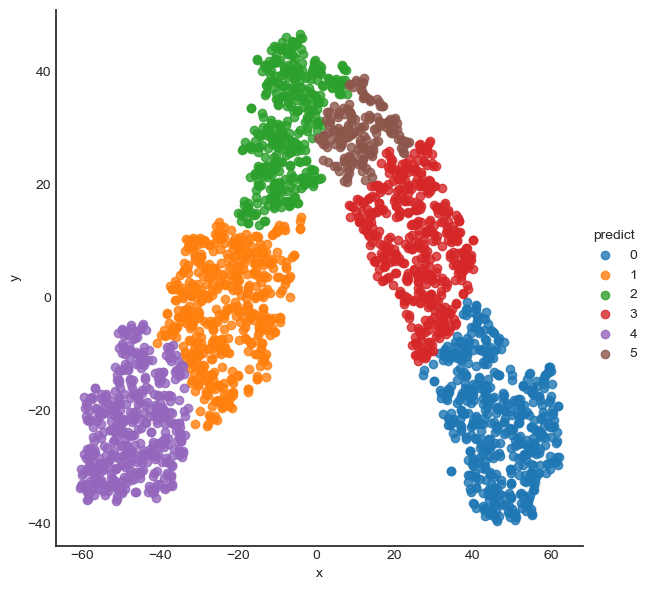

In [94]:
# 시각화해보자
sns.lmplot("x", "y", data = results, fit_reg = False, size = 6, hue = "predict")
plt.show()

#### complete


In [95]:
compl = AgglomerativeClustering(n_clusters=6, linkage="complete")
predict = compl.fit_predict(df)
predict

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [98]:
results = df.copy()
results["predict"] = predict
results[:10]

,x,y,predict
어리,57.003796,-27.568016,0
ㄹ,55.052330,-38.406227,0
때,59.729580,-28.101372,0
보고,52.068676,-24.596043,0
지금,60.176685,-29.239397,0
다시,61.165062,-28.961124,0
보,61.475121,-28.364225,0
아도,61.398529,-29.158007,0
을,46.181599,-39.664101,0
배우,39.333050,-33.876740,0


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


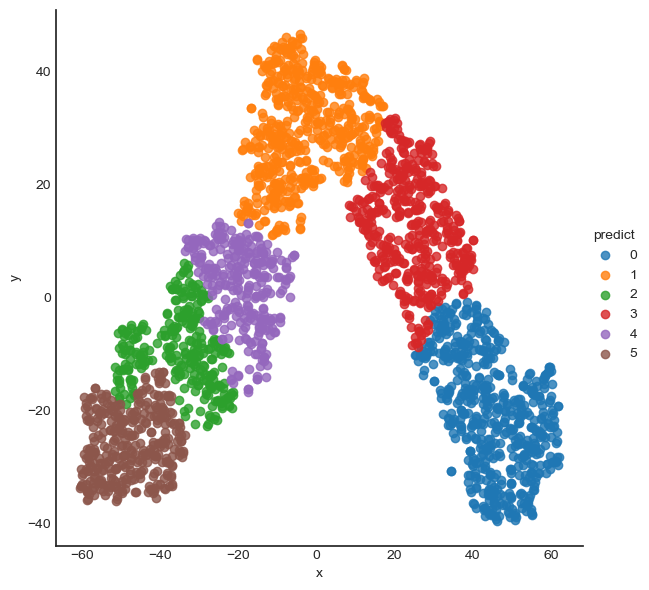

In [99]:
# 시각화해보자
sns.lmplot("x", "y", data = results, fit_reg = False, size = 6, hue = "predict")
plt.show()

### scipy

- scipy를 이용한 거리 사용과 word2vec 사용을 비교하자

- `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [106]:
from scipy.spatial.distance import pdist, squareform       # squareform : 벡터 형태의 거리 벡터를 정사각형 형태의 거리 행렬로 변환하거나 그 반대로 변환
from scipy.cluster.hierarchy import linkage, dendrogram    # linkage : 계층적 / 집합적 클러스터링을 수행한다.

distmatrix = pdist(df, metric="euclidean") # 유클리디안 거리 계산
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist


,0,1,2,3,4,5,6,7,8,9,...,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438
0,0.000000,11.012495,2.777475,5.760905,3.586188,4.388267,4.541662,4.673516,16.230687,18.763135,...,108.951394,108.276263,96.619625,115.600123,98.365628,115.782072,112.208654,117.765949,113.892388,109.456960
1,11.012495,0.000000,11.316656,14.128814,10.501895,11.250576,11.920320,11.216230,8.959471,16.358852,...,108.945773,106.104972,97.822327,114.875026,96.971124,114.406983,111.691021,115.751668,112.530729,107.986007
2,2.777475,11.316656,0.000000,8.424772,1.222704,1.673255,1.765221,1.975315,17.811359,21.198427,...,111.722944,110.960103,99.395167,118.355201,101.090416,118.511937,114.969388,120.462227,116.622491,112.180912
3,5.760905,14.128814,8.424772,0.000000,9.343477,10.089508,10.133134,10.385455,16.177270,15.758411,...,103.705432,103.615533,91.152072,110.515058,93.492138,110.869461,107.077160,113.037907,108.979119,104.582434
4,3.586188,10.501895,1.222704,9.343477,0.000000,1.026803,1.565841,1.224552,17.450986,21.353269,...,112.317539,111.339683,100.095016,118.883342,101.544828,118.975778,115.516378,120.861628,117.086978,112.632663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,115.782072,114.406983,118.511937,110.869461,118.975778,119.958907,120.260265,120.195847,105.729092,98.355938,...,15.249368,11.350118,30.552707,6.830024,17.450345,0.000000,9.413133,7.010367,1.890342,6.455772
2435,112.208654,111.691021,114.969388,107.077160,115.516378,116.474786,116.730965,116.725314,103.228499,95.428287,...,5.950644,17.245185,21.986478,3.927824,16.564151,9.413133,0.000000,16.365952,8.751541,10.119674
2436,117.765949,115.751668,120.462227,113.037907,120.861628,121.859815,122.194186,122.085645,106.951846,99.936319,...,22.089847,9.716157,36.779586,13.769973,20.059821,7.010367,16.365952,0.000000,7.755611,9.820459
2437,113.892388,112.530729,116.622491,108.979119,117.086978,118.069922,118.370942,118.306981,103.857961,96.473637,...,14.351321,10.181474,29.210254,6.935359,15.567412,1.890342,8.751541,7.755611,0.000000,4.630597


- 이제 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

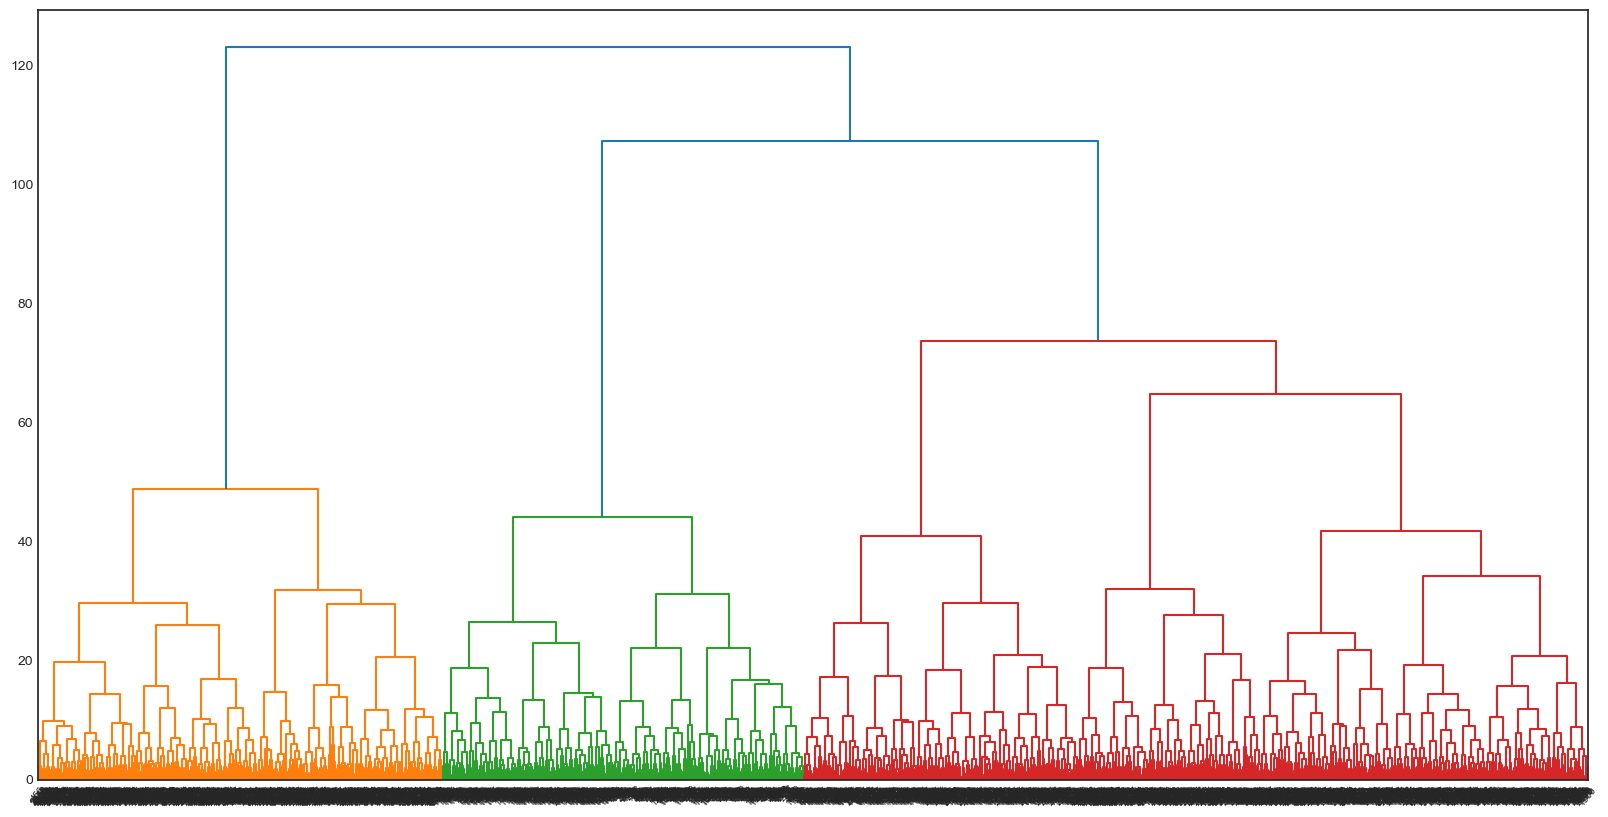

In [122]:
row_clusters = linkage(distmatrix, method = "complete")

plt.figure(figsize = (20, 10))
dendrogram(row_clusters,
           leaf_rotation = 50,
           leaf_font_size = 7)

plt.show()

- word2vec을 이용한 군집 분석 및 덴드로그램 시각화

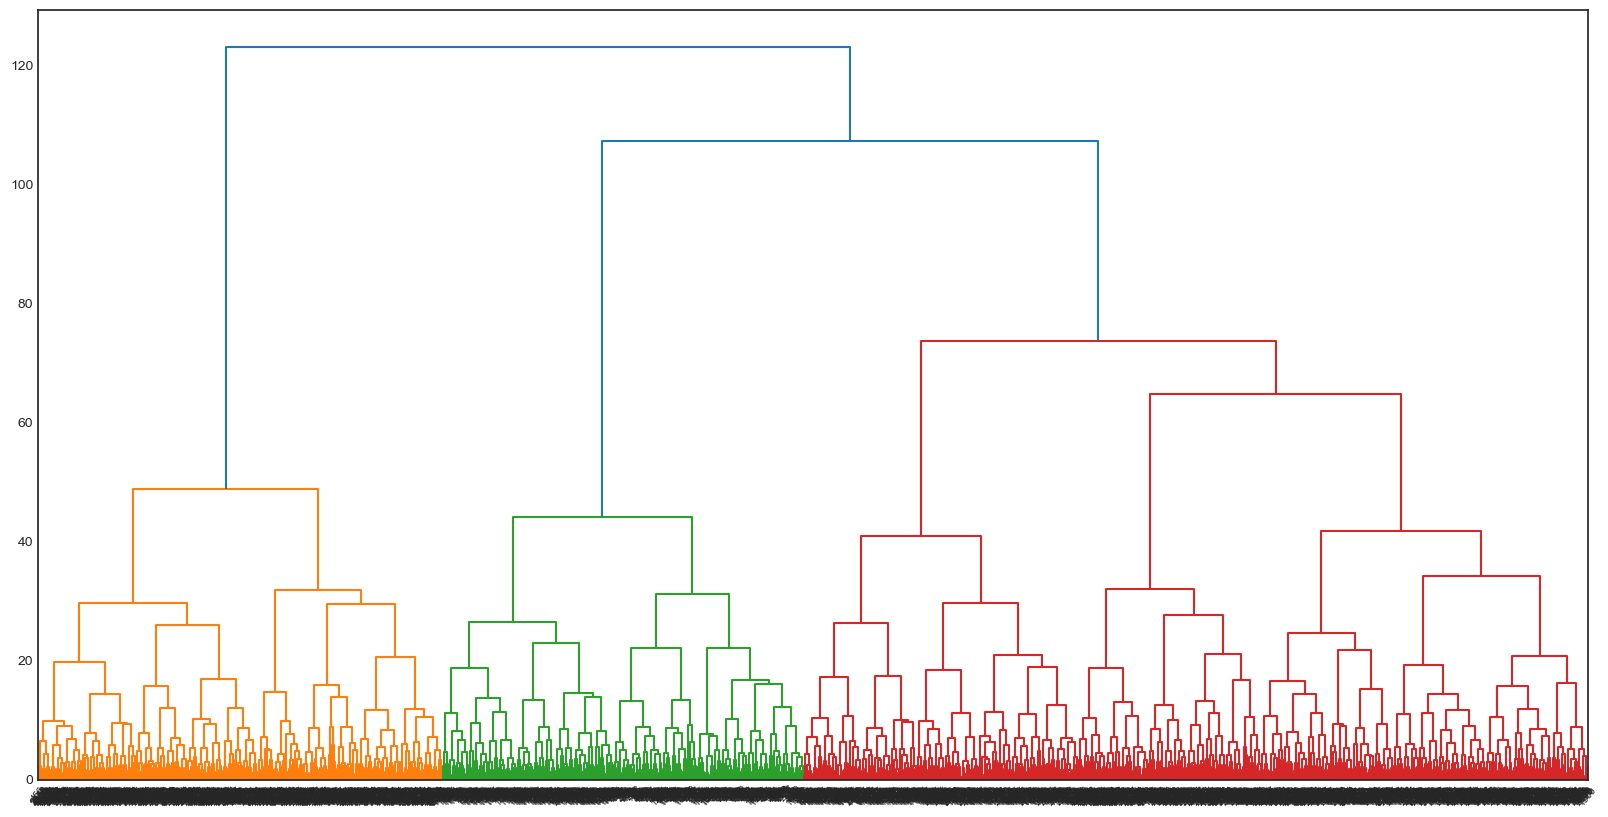

In [128]:
mergings = linkage(df, method = "complete")

plt.figure(figsize = (20, 10))
dendrogram(mergings,
           leaf_rotation = 50,
           leaf_font_size = 7)

plt.show()

## Scikit-learn을 이용한 비계층적 군집화

- 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
- 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

- 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

predict = kmeans.fit_predict(df)

C:\Users\tmdwn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [131]:
predict

array([1, 1, 1, ..., 0, 0, 0])

In [132]:
results = df.copy()
results["predict"] = predict
results[:10]

,x,y,predict
어리,57.003796,-27.568016,1
ㄹ,55.052330,-38.406227,1
때,59.729580,-28.101372,1
보고,52.068676,-24.596043,1
지금,60.176685,-29.239397,1
다시,61.165062,-28.961124,1
보,61.475121,-28.364225,1
아도,61.398529,-29.158007,1
을,46.181599,-39.664101,1
배우,39.333050,-33.876740,1


C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tmdwn\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


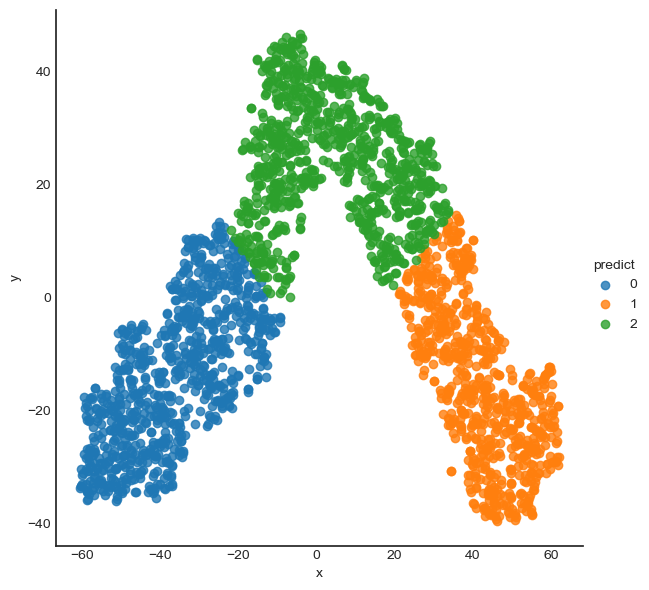

In [134]:
sns.lmplot("x", "y", data = results, fit_reg=False, size = 6, hue = "predict")
plt.show()

### 클러스터 개수 6

# kmeans = KMeans(n_clusters=6)

predict = kmeans.fit_predict(df)

In [136]:
predict

array([0, 0, 0, ..., 1, 1, 1])

In [137]:
results = df.copy()
results["predict"] = predict
results[:10]

,x,y,predict
어리,57.003796,-27.568016,0
ㄹ,55.052330,-38.406227,0
때,59.729580,-28.101372,0
보고,52.068676,-24.596043,0
지금,60.176685,-29.239397,0
다시,61.165062,-28.961124,0
보,61.475121,-28.364225,0
아도,61.398529,-29.158007,0
을,46.181599,-39.664101,0
배우,39.333050,-33.876740,0
